In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.shape #checking the total no. of rows and columns

(891, 12)

In [5]:
Data=Data.drop("PassengerId",axis=1) #dropping passenger ID as it adds no value to the data

In [6]:
Data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
Data.isnull().sum() #checking the null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
Data=Data.drop("Name",axis=1) #dropping name as it adds no value to the data

In [10]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [11]:
Data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
Data["Sex"]=Data["Sex"].replace({'male':1,'female':0})
Data["Sex"] #replacing the values of Sex with 1 and 0

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [14]:
enc= LabelEncoder()
si= SimpleImputer()

In [15]:
columns=['Cabin','Ticket','Embarked']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [16]:
Data['Age']=si.fit_transform(Data[['Age']]) #Imputing the null data types

In [17]:
Data['Cabin']=si.fit_transform(Data[['Cabin']]) #Imputing the null data types

In [18]:
Data #Checking the values after encoding and imputing

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,147.0,2
1,1,1,0,38.000000,1,0,596,71.2833,81.0,0
2,1,3,0,26.000000,0,0,669,7.9250,147.0,2
3,1,1,0,35.000000,1,0,49,53.1000,55.0,2
4,0,3,1,35.000000,0,0,472,8.0500,147.0,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,147.0,2
887,1,1,0,19.000000,0,0,14,30.0000,30.0,2
888,0,3,0,29.699118,1,2,675,23.4500,147.0,2
889,1,1,1,26.000000,0,0,8,30.0000,60.0,0


In [19]:
Data.info() #checking object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    float64
 9   Embarked  891 non-null    int32  
dtypes: float64(3), int32(2), int64(5)
memory usage: 62.8 KB


In [20]:
Data.isnull().sum() #checking null values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [21]:
Data.describe() #checking the statistics of the data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [22]:
# There is a difference in mean and standard deviation
# Age cannot be less than 1
#Fare, Ticket and cabin cannot be zero

In [23]:
Age_Null=np.where(Data["Age"]<1) #checking the location of the data where in age is less than 1
Age_Null

(array([ 78, 305, 469, 644, 755, 803, 831], dtype=int64),)

In [24]:
Data=Data.drop(Data.index[Age_Null],axis=0)
Data #dropping the rows where in age is less than 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,147.0,2
1,1,1,0,38.000000,1,0,596,71.2833,81.0,0
2,1,3,0,26.000000,0,0,669,7.9250,147.0,2
3,1,1,0,35.000000,1,0,49,53.1000,55.0,2
4,0,3,1,35.000000,0,0,472,8.0500,147.0,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,147.0,2
887,1,1,0,19.000000,0,0,14,30.0000,30.0,2
888,0,3,0,29.699118,1,2,675,23.4500,147.0,2
889,1,1,1,26.000000,0,0,8,30.0000,60.0,0


In [25]:
np.where(Data["Age"]<1) #checking the location of the data where in age is less than 1


(array([], dtype=int64),)

In [26]:
Fare_Null=np.where(Data["Fare"]==0) #checking the location of the data where Fare is 0
Fare_Null

(array([178, 262, 270, 276, 301, 411, 464, 478, 594, 630, 670, 728, 800,
        809, 816], dtype=int64),)

In [27]:
Data=Data.drop(Data.index[Fare_Null],axis=0)


In [28]:
Data #dropping only fare as cabin and ticket were object data type which has been imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,147.0,2
1,1,1,0,38.000000,1,0,596,71.2833,81.0,0
2,1,3,0,26.000000,0,0,669,7.9250,147.0,2
3,1,1,0,35.000000,1,0,49,53.1000,55.0,2
4,0,3,1,35.000000,0,0,472,8.0500,147.0,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,147.0,2
887,1,1,0,19.000000,0,0,14,30.0000,30.0,2
888,0,3,0,29.699118,1,2,675,23.4500,147.0,2
889,1,1,1,26.000000,0,0,8,30.0000,60.0,0


In [29]:
Data_Loss=(891-869)/891*100
Data_Loss #Checking the data loss

2.4691358024691357

In [30]:
Data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.384350,2.315305,0.640967,29.888551,0.528193,0.380898,342.006904,32.719351,130.853855,1.533947
std,0.486721,0.836664,0.479993,12.868710,1.111606,0.809593,199.979866,49.958129,35.773456,0.796195
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.012500,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,164.000000,7.925000,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,339.000000,14.500000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,521.000000,31.275000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [31]:
X=Data.drop("Survived",axis=1)
Y=Data["Survived"] # Differentiating the features and labels

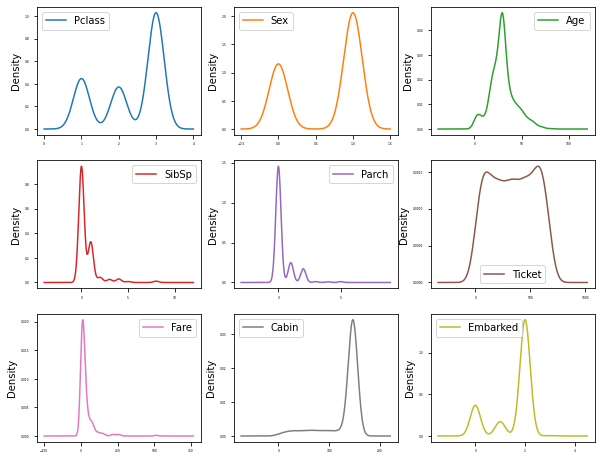

In [32]:
X.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [33]:
#Age,SibSp,Parch,Fare, Cabin and Embarked are all skewed

In [34]:
X.skew().sort_values(ascending=False) #checking the skewness

Fare        4.789445
SibSp       3.681646
Parch       2.765558
Age         0.502735
Ticket     -0.023402
Sex        -0.588724
Pclass     -0.646666
Embarked   -1.230155
Cabin      -2.175656
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform

In [36]:
New_X=power_transform(X)

In [37]:
pd.DataFrame(New_X).skew().sort_values(ascending=False) # transforming the data to reduce skewness

4    1.241721
3    0.798696
6    0.236109
2    0.077058
5   -0.305935
0   -0.455350
1   -0.588724
8   -0.851276
7   -1.598662
dtype: float64

In [38]:
X=pd.DataFrame(New_X,columns=X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.855413,0.748427,-0.574697,1.364083,-0.557177,0.895304,-1.221134,0.505877,0.593615
1,-1.463552,-1.336135,0.654318,1.364083,-0.557177,1.189773,1.383553,-2.053377,-1.758068
2,0.855413,-1.336135,-0.253722,-0.683300,-0.557177,1.473569,-1.058791,0.505877,0.593615
3,-1.463552,-1.336135,0.433787,1.364083,-0.557177,-1.592729,1.194720,-2.243021,0.593615
4,0.855413,0.748427,0.433787,-0.683300,-0.557177,0.682212,-1.030844,0.505877,0.593615
...,...,...,...,...,...,...,...,...,...
864,-0.609566,0.748427,-0.175132,-0.683300,-0.557177,-1.206985,-0.259595,0.505877,0.593615
865,-1.463552,-1.336135,-0.823370,-0.683300,-0.557177,-1.932487,0.729160,-2.287422,0.593615
866,0.855413,-1.336135,0.034053,1.364083,1.855021,1.496469,0.480101,0.505877,0.593615
867,-1.463552,0.748427,-0.253722,-0.683300,-0.557177,-2.009778,0.729160,-2.222220,-1.758068


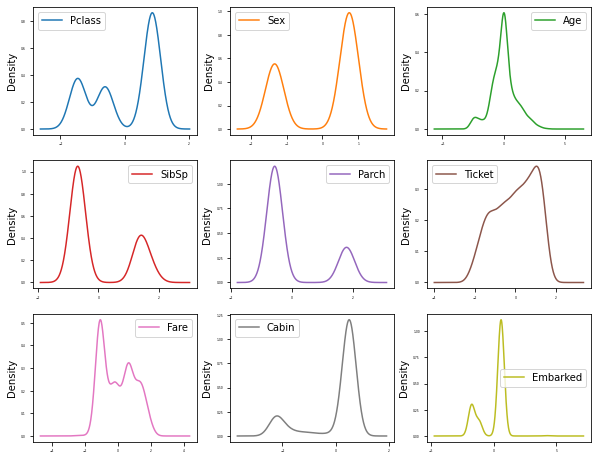

In [39]:
pd.DataFrame(X).plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

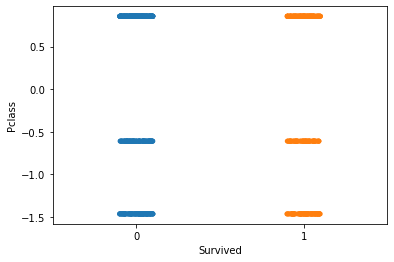

In [40]:
sns.stripplot(Y,X["Pclass"])
plt.show() #Checking the relation of Pclass with Survived

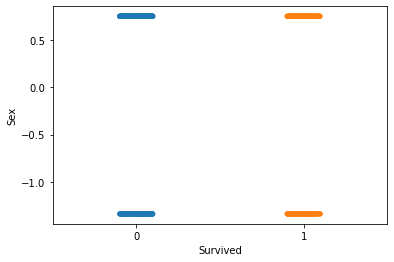

In [41]:
sns.stripplot(Y,X["Sex"])
plt.show() #Checking the relation of Sex with Survived

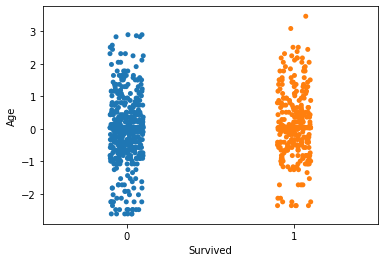

In [42]:
sns.stripplot(Y,X["Age"])
plt.show() #Checking the relation of Age with Survived

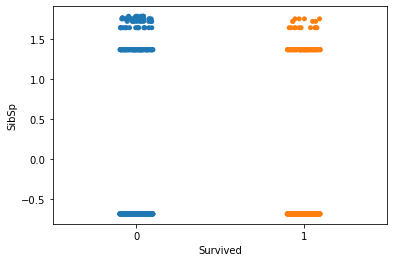

In [43]:
sns.stripplot(Y,X["SibSp"])
plt.show() #Checking the relation of SibSp with Survived

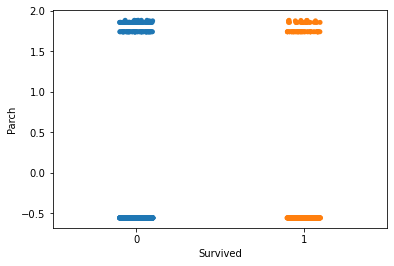

In [44]:
sns.stripplot(Y,X["Parch"])
plt.show() #Checking the relation of Parch with Survived

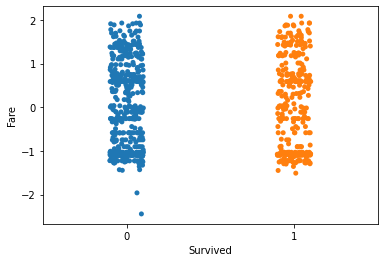

In [45]:
sns.stripplot(Y,X["Fare"])
plt.show() #Checking the relation of Fare with Survived

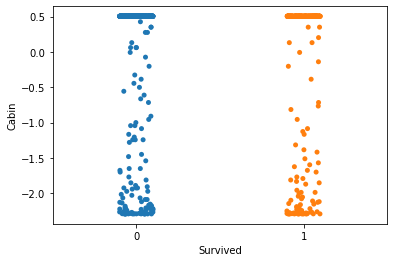

In [46]:
sns.stripplot(Y,X["Cabin"])
plt.show() #Checking the relation of cabin with Survived

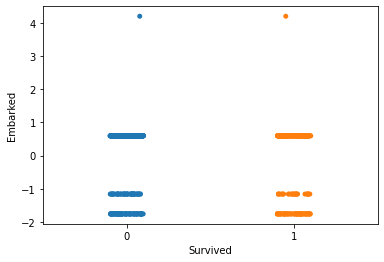

In [47]:
sns.stripplot(Y,X["Embarked"])
plt.show() #Checking the relation of embarked with Survived

# From the above observations, it can be concluded that there is not much relation between the labels and features

## However a small change can be seen in fare as in people who paid more fare had a little more chance of survival than the ones who paid less

<AxesSubplot:xlabel='Survived', ylabel='count'>

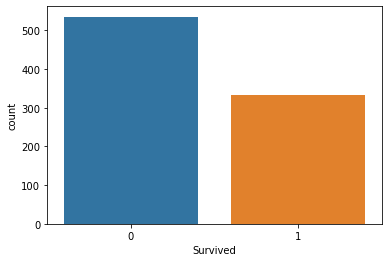

In [48]:
sns.countplot(Y) #checking the target data

In [49]:
Y.value_counts()

0    535
1    334
Name: Survived, dtype: int64

In [50]:
# Data is structured

In [51]:
X.corr()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.000000,0.149763,-0.322390,-0.066417,-0.033948,0.366537,-0.736705,0.700421,0.092046
Sex,0.149763,1.000000,0.089505,-0.192396,-0.250300,0.073874,-0.258126,0.129676,0.090409
Age,-0.322390,0.089505,1.000000,-0.173186,-0.269476,-0.100900,0.103018,-0.248152,-0.024061
SibSp,-0.066417,-0.192396,-0.173186,1.000000,0.430992,0.002847,0.449098,-0.057237,0.007707
Parch,-0.033948,-0.250300,-0.269476,0.430992,1.000000,0.000877,0.409766,-0.063438,0.027386
Ticket,0.366537,0.073874,-0.100900,0.002847,0.000877,1.000000,-0.245635,0.294272,-0.020314
Fare,-0.736705,-0.258126,0.103018,0.449098,0.409766,-0.245635,1.000000,-0.595241,-0.093248
Cabin,0.700421,0.129676,-0.248152,-0.057237,-0.063438,0.294272,-0.595241,1.000000,0.157286
Embarked,0.092046,0.090409,-0.024061,0.007707,0.027386,-0.020314,-0.093248,0.157286,1.000000


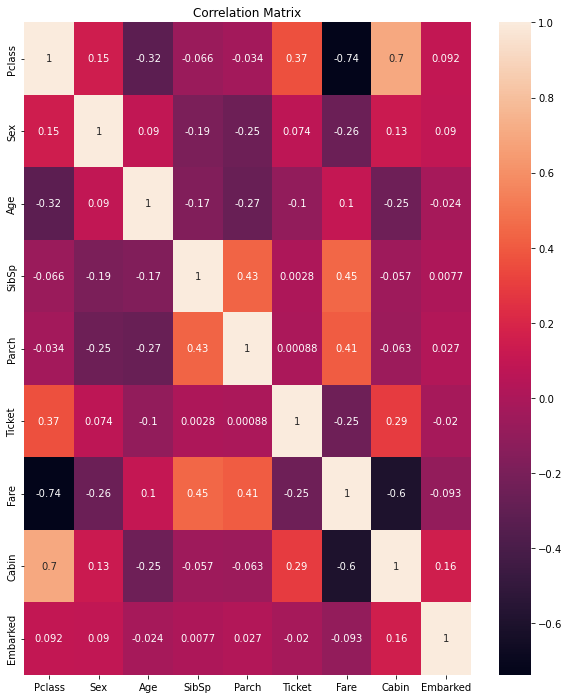

In [52]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [53]:
# From the heat map it seems there is not much high correlation between the feature variables
#Therefore trying via the VIF technique to see any multicollinearity

In [54]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Pclass,3.905822
1,Sex,1.118270
2,Age,1.245502
3,SibSp,1.608056
4,Parch,1.613694
5,Ticket,1.169281
6,Fare,4.336335
7,Cabin,2.089505
8,Embarked,1.042787


In [55]:
# From the VIF, it can be concluded that there is not much issue of multicollinearity in the features

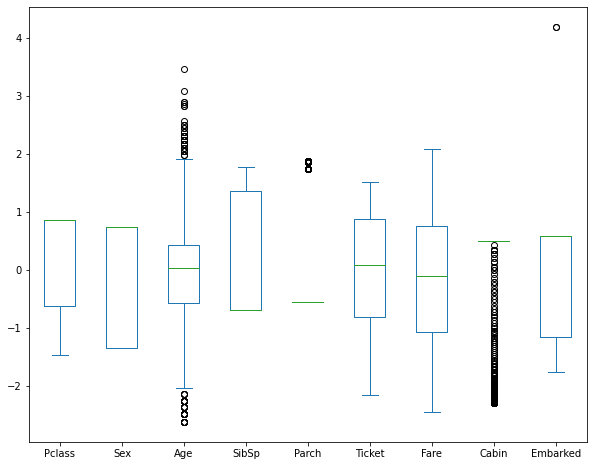

In [56]:
X.plot(kind='box',figsize=(10,8),layout=(3,3))
plt.show() #checking for oultiers

In [57]:
#Huge Outliers are observed in Age,Parch,Cabin and Embarked

In [58]:
from scipy.stats import zscore # zcore to calculate the outliers

In [59]:
(np.abs(zscore(X)<3)).all()

Pclass       True
Sex          True
Age         False
SibSp        True
Parch        True
Ticket       True
Fare         True
Cabin        True
Embarked    False
dtype: bool

In [60]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([ 61, 618, 808, 829], dtype=int64), array([8, 2, 8, 2], dtype=int64))

In [61]:
# assigning a variable to the values having less than 3 zscore
X_new = X[(np.abs(zscore(X))<3).all(axis=1)]
X_new

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.855413,0.748427,-0.574697,1.364083,-0.557177,0.895304,-1.221134,0.505877,0.593615
1,-1.463552,-1.336135,0.654318,1.364083,-0.557177,1.189773,1.383553,-2.053377,-1.758068
2,0.855413,-1.336135,-0.253722,-0.683300,-0.557177,1.473569,-1.058791,0.505877,0.593615
3,-1.463552,-1.336135,0.433787,1.364083,-0.557177,-1.592729,1.194720,-2.243021,0.593615
4,0.855413,0.748427,0.433787,-0.683300,-0.557177,0.682212,-1.030844,0.505877,0.593615
...,...,...,...,...,...,...,...,...,...
864,-0.609566,0.748427,-0.175132,-0.683300,-0.557177,-1.206985,-0.259595,0.505877,0.593615
865,-1.463552,-1.336135,-0.823370,-0.683300,-0.557177,-1.932487,0.729160,-2.287422,0.593615
866,0.855413,-1.336135,0.034053,1.364083,1.855021,1.496469,0.480101,0.505877,0.593615
867,-1.463552,0.748427,-0.253722,-0.683300,-0.557177,-2.009778,0.729160,-2.222220,-1.758068


In [62]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 865, dtype: int64

In [63]:
Scalar=StandardScaler() #scaling the data

In [64]:
X_Scaled=Scalar.fit_transform(X_new)
X_Scaled

array([[ 0.8528916 ,  0.74736775, -0.57146988, ..., -1.21956913,
         0.502025  ,  0.61618574],
       [-1.47033771, -1.33802936,  0.67446975, ...,  1.38803772,
        -2.07523947, -1.78022695],
       [ 0.8528916 , -1.33802936, -0.24607505, ..., -1.057044  ,
         0.502025  ,  0.61618574],
       ...,
       [ 0.8528916 , -1.33802936,  0.04566301, ...,  0.48357356,
         0.502025  ,  0.61618574],
       [-1.47033771,  0.74736775, -0.24607505, ...,  0.73291115,
        -2.24527074, -1.78022695],
       [ 0.8528916 ,  0.74736775,  0.22327471, ..., -1.0972715 ,
         0.502025  , -1.17073077]])

# Logistic Regression

In [65]:
LR=LogisticRegression()

In [66]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7630057803468208
/n
At random state 1 the testing accurancy is:- 0.7861271676300579
/n
At random state 2 the testing accurancy is:- 0.8497109826589595
/n
At random state 3 the testing accurancy is:- 0.8092485549132948
/n
At random state 4 the testing accurancy is:- 0.7745664739884393
/n
At random state 5 the testing accurancy is:- 0.7861271676300579
/n
At random state 6 the testing accurancy is:- 0.7514450867052023
/n
At random state 7 the testing accurancy is:- 0.7572254335260116
/n
At random state 8 the testing accurancy is:- 0.815028901734104
/n
At random state 9 the testing accurancy is:- 0.7745664739884393
/n
At random state 10 the testing accurancy is:- 0.791907514450867
/n
At random state 11 the testing accurancy is:- 0.7398843930635838
/n
At random state 12 the testing accurancy is:- 0.7687861271676301
/n
At random state 13 the testing accurancy is:- 0.8554913294797688
/n
At random state 14 the testing accurancy is:- 0.722543352601

In [67]:
#At random state 67 the testing accurancy is:-86.12%

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=67)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)

In [69]:
LR_Score=accuracy_score(y_test,pred_test)*100
LR_Score

86.1271676300578

# Random Forest Classifier

In [70]:
RF=RandomForestClassifier()

In [114]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7745664739884393
/n
At random state 1 the testing accurancy is:- 0.8092485549132948
/n
At random state 2 the testing accurancy is:- 0.815028901734104
/n
At random state 3 the testing accurancy is:- 0.8497109826589595
/n
At random state 4 the testing accurancy is:- 0.7514450867052023
/n
At random state 5 the testing accurancy is:- 0.791907514450867
/n
At random state 6 the testing accurancy is:- 0.8034682080924855
/n
At random state 7 the testing accurancy is:- 0.7976878612716763
/n
At random state 8 the testing accurancy is:- 0.8439306358381503
/n
At random state 9 the testing accurancy is:- 0.7803468208092486
/n
At random state 10 the testing accurancy is:- 0.8323699421965318
/n
At random state 11 the testing accurancy is:- 0.7976878612716763
/n
At random state 12 the testing accurancy is:- 0.7976878612716763
/n
At random state 13 the testing accurancy is:- 0.861271676300578
/n
At random state 14 the testing accurancy is:- 0.7803468208092

In [123]:
#At random state 52 the testing accurancy is:- 0.8497109826589595

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=52)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)

In [122]:
RF_Score=accuracy_score(y_test,pred_test)*100
RF_Score

84.39306358381504

# K Nearest Neighbour

In [75]:
knn=KNeighborsClassifier()

In [76]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    knn.fit(X_train,y_train)
    pred_test=knn.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7803468208092486
/n
At random state 1 the testing accurancy is:- 0.7803468208092486
/n
At random state 2 the testing accurancy is:- 0.7861271676300579
/n
At random state 3 the testing accurancy is:- 0.8034682080924855
/n
At random state 4 the testing accurancy is:- 0.7052023121387283
/n
At random state 5 the testing accurancy is:- 0.7861271676300579
/n
At random state 6 the testing accurancy is:- 0.8034682080924855
/n
At random state 7 the testing accurancy is:- 0.7514450867052023
/n
At random state 8 the testing accurancy is:- 0.7803468208092486
/n
At random state 9 the testing accurancy is:- 0.7572254335260116
/n
At random state 10 the testing accurancy is:- 0.7745664739884393
/n
At random state 11 the testing accurancy is:- 0.7514450867052023
/n
At random state 12 the testing accurancy is:- 0.7630057803468208
/n
At random state 13 the testing accurancy is:- 0.8208092485549133
/n
At random state 14 the testing accurancy is:- 0.7630057803

# Decision Tree

In [77]:
DT=DecisionTreeClassifier()

In [78]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    DT.fit(X_train,y_train)
    pred_test=DT.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7745664739884393
/n
At random state 1 the testing accurancy is:- 0.7167630057803468
/n
At random state 2 the testing accurancy is:- 0.791907514450867
/n
At random state 3 the testing accurancy is:- 0.8034682080924855
/n
At random state 4 the testing accurancy is:- 0.6820809248554913
/n
At random state 5 the testing accurancy is:- 0.7514450867052023
/n
At random state 6 the testing accurancy is:- 0.7225433526011561
/n
At random state 7 the testing accurancy is:- 0.7225433526011561
/n
At random state 8 the testing accurancy is:- 0.7630057803468208
/n
At random state 9 the testing accurancy is:- 0.7572254335260116
/n
At random state 10 the testing accurancy is:- 0.7630057803468208
/n
At random state 11 the testing accurancy is:- 0.7861271676300579
/n
At random state 12 the testing accurancy is:- 0.7630057803468208
/n
At random state 13 the testing accurancy is:- 0.8265895953757225
/n
At random state 14 the testing accurancy is:- 0.73410404624

# Gradient Boosting

In [79]:
GB=GradientBoostingClassifier()

In [80]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.791907514450867
/n
At random state 1 the testing accurancy is:- 0.7976878612716763
/n
At random state 2 the testing accurancy is:- 0.7745664739884393
/n
At random state 3 the testing accurancy is:- 0.8439306358381503
/n
At random state 4 the testing accurancy is:- 0.7976878612716763
/n
At random state 5 the testing accurancy is:- 0.815028901734104
/n
At random state 6 the testing accurancy is:- 0.7861271676300579
/n
At random state 7 the testing accurancy is:- 0.8034682080924855
/n
At random state 8 the testing accurancy is:- 0.8670520231213873
/n
At random state 9 the testing accurancy is:- 0.791907514450867
/n
At random state 10 the testing accurancy is:- 0.8323699421965318
/n
At random state 11 the testing accurancy is:- 0.7745664739884393
/n
At random state 12 the testing accurancy is:- 0.7976878612716763
/n
At random state 13 the testing accurancy is:- 0.8554913294797688
/n
At random state 14 the testing accurancy is:- 0.7976878612716

In [81]:
#At random state 45 the testing accurancy is:- 0.9075144508670521

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=45)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [83]:
GB_Score=accuracy_score(y_test,pred_test)*100
GB_Score

90.7514450867052

# SVC

In [84]:
svc=SVC()

In [100]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    svc.fit(X_train,y_train)
    pred_test=svc.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7630057803468208
/n
At random state 1 the testing accurancy is:- 0.791907514450867
/n
At random state 2 the testing accurancy is:- 0.7803468208092486
/n
At random state 3 the testing accurancy is:- 0.8208092485549133
/n
At random state 4 the testing accurancy is:- 0.7861271676300579
/n
At random state 5 the testing accurancy is:- 0.8034682080924855
/n
At random state 6 the testing accurancy is:- 0.791907514450867
/n
At random state 7 the testing accurancy is:- 0.7687861271676301
/n
At random state 8 the testing accurancy is:- 0.8092485549132948
/n
At random state 9 the testing accurancy is:- 0.7687861271676301
/n
At random state 10 the testing accurancy is:- 0.7976878612716763
/n
At random state 11 the testing accurancy is:- 0.7456647398843931
/n
At random state 12 the testing accurancy is:- 0.7572254335260116
/n
At random state 13 the testing accurancy is:- 0.8323699421965318
/n
At random state 14 the testing accurancy is:- 0.751445086705

In [89]:
#At random state 65 the testing accurancy is:- 0.8323699421965318

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=65)
svc.fit(X_train,y_train)
pred_test=svc.predict(X_test)

In [91]:
svc_Score=accuracy_score(y_test,pred_test)*100
svc_Score

83.23699421965318

# Cross Validation for LR

In [93]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.7676257377469848
The cross validation score for 3 is 0.7733884403434578
The cross validation score for 4 is 0.7780231268134494
The cross validation score for 5 is 0.7745664739884394
The cross validation score for 6 is 0.7826309067688378
The cross validation score for 7 is 0.7825671574688098
The cross validation score for 8 is 0.7825985389058784
The cross validation score for 9 is 0.7802954371897671


# Cross Validation for RF

In [94]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean())

The cross validation score for 2 is 0.7641642075100505
The cross validation score for 3 is 0.8000168204536716
The cross validation score for 4 is 0.7931387608806963
The cross validation score for 5 is 0.8104046242774565
The cross validation score for 6 is 0.8058189655172413
The cross validation score for 7 is 0.8045876887340302
The cross validation score for 8 is 0.8058528712198436
The cross validation score for 9 is 0.8139199121802215


# Cross Validation for knn

In [95]:
for i in range(2,10):
    knn_Val=cross_val_score(knn,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",knn_Val.mean())

The cross validation score for 2 is 0.7375892780771534
The cross validation score for 3 is 0.7514577726515442
The cross validation score for 4 is 0.7711480201399556
The cross validation score for 5 is 0.778034682080925
The cross validation score for 6 is 0.7688457854406131
The cross validation score for 7 is 0.7710557865947323
The cross validation score for 8 is 0.7699838600067958
The cross validation score for 9 is 0.7769186712485682


# Cross Validation for DT

In [96]:
for i in range(2,10):
    DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean())

The cross validation score for 2 is 0.7225510007698229
The cross validation score for 3 is 0.722570645905421
The cross validation score for 4 is 0.7341323178016727
The cross validation score for 5 is 0.7433526011560694
The cross validation score for 6 is 0.7630587484035759
The cross validation score for 7 is 0.7468809711138586
The cross validation score for 8 is 0.7491611450900442
The cross validation score for 9 is 0.7560734058801069


# Cross Validation for GB

In [97]:
for i in range(2,10):
    GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.7907418099392696
The cross validation score for 3 is 0.7884427463795977
The cross validation score for 4 is 0.7954215736473801
The cross validation score for 5 is 0.8196531791907514
The cross validation score for 6 is 0.8231242017879948
The cross validation score for 7 is 0.8103667903038477
The cross validation score for 8 is 0.8150590383961944
The cross validation score for 9 is 0.8069635357006492


# Cross Validation for SVC

In [98]:
for i in range(2,10):
    SVC_Val=cross_val_score(svc,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",SVC_Val.mean())

The cross validation score for 2 is 0.7791811008468053
The cross validation score for 3 is 0.7872733243624248
The cross validation score for 4 is 0.788429126130739
The cross validation score for 5 is 0.7884393063583814
The cross validation score for 6 is 0.7919300766283525
The cross validation score for 7 is 0.7918867783147877
The cross validation score for 8 is 0.7849558273870201
The cross validation score for 9 is 0.7919053073692249


In [99]:
#Based on the testing accuracy and cross validation for the above 6 models-
#Logistic Regression,Random Forest Classifier and Gradient Boosting gives the highest testing accuracy 
#However models for Logistic Regression and Gradient Boosting is overfitted as compared to Random Forest Classifier
#Therefore as the cross validation score and accuracy score for Random Forest Classifier is nearest, hence choosing Random Forest Classifier in this dataset

# Hypertuning Parameters

In [101]:
rcf=RandomForestClassifier()

In [102]:
parameters={'max_features':["auto", "sqrt", "log2"],'criterion':["entropy","ginny"],'max_depth':(list(range(5,20))),'min_samples_split':(list(range(4,6))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(rcf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'ginny'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [4, 5]})

In [103]:
clf.best_params_ #taking the best parameters

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [106]:
for i in range(0,100):
    rcf=RandomForestClassifier(criterion='entropy',max_depth=13,max_features='sqrt',min_samples_leaf=2,min_samples_split=4,random_state=i)
    rcf.fit(X_train,y_train)
    rcf_pred=rcf.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,rcf_pred))
    print("/n")

At random state 0 the testing accurancy is:- 0.8323699421965318
/n
At random state 1 the testing accurancy is:- 0.8034682080924855
/n
At random state 2 the testing accurancy is:- 0.8034682080924855
/n
At random state 3 the testing accurancy is:- 0.8034682080924855
/n
At random state 4 the testing accurancy is:- 0.815028901734104
/n
At random state 5 the testing accurancy is:- 0.8092485549132948
/n
At random state 6 the testing accurancy is:- 0.8208092485549133
/n
At random state 7 the testing accurancy is:- 0.8092485549132948
/n
At random state 8 the testing accurancy is:- 0.8208092485549133
/n
At random state 9 the testing accurancy is:- 0.815028901734104
/n
At random state 10 the testing accurancy is:- 0.8034682080924855
/n
At random state 11 the testing accurancy is:- 0.8034682080924855
/n
At random state 12 the testing accurancy is:- 0.791907514450867
/n
At random state 13 the testing accurancy is:- 0.7976878612716763
/n
At random state 14 the testing accurancy is:- 0.8150289017341

In [111]:
for i in range(0,100):
    rcf=RandomForestClassifier(criterion='entropy',max_depth=15,max_features='log2',min_samples_leaf=2,min_samples_split=4,random_state=i)
    rcf.fit(X_train,y_train)
    rcf_pred=rcf.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,rcf_pred))
    print("/n")

At random state 0 the testing accurancy is:- 0.815028901734104
/n
At random state 1 the testing accurancy is:- 0.8208092485549133
/n
At random state 2 the testing accurancy is:- 0.8034682080924855
/n
At random state 3 the testing accurancy is:- 0.8092485549132948
/n
At random state 4 the testing accurancy is:- 0.7976878612716763
/n
At random state 5 the testing accurancy is:- 0.8208092485549133
/n
At random state 6 the testing accurancy is:- 0.8208092485549133
/n
At random state 7 the testing accurancy is:- 0.8034682080924855
/n
At random state 8 the testing accurancy is:- 0.8323699421965318
/n
At random state 9 the testing accurancy is:- 0.815028901734104
/n
At random state 10 the testing accurancy is:- 0.7976878612716763
/n
At random state 11 the testing accurancy is:- 0.7976878612716763
/n
At random state 12 the testing accurancy is:- 0.815028901734104
/n
At random state 13 the testing accurancy is:- 0.7976878612716763
/n
At random state 14 the testing accurancy is:- 0.8092485549132

## Therefore it can be concluded that both the scores after hyper parameter tuning is less than the original score in Random Forest Classifier

In [124]:
import pickle
filename='Titanic Project.pkl'
pickle.dump(RF,open(filename,'wb')) ##saving the model